PROBLEM STATEMENT :-

Predicting the sale price of houses in King County, US with varying features and understand which factors are responsible for a range of property prices.

ABOUT THE DATA :-

A dataset with records of the house prices of 9,761 houses in King County, Washington, US. The house prices are recorded along with some other attributes like - area of the house, number of bedrooms, number of bathrooms, etc.

In [7125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7126]:
import warnings
warnings.filterwarnings("ignore") 

In [7127]:
train_data = pd.read_csv('kc_house_train_data.csv')

In [7128]:
test_data = pd.read_csv('kc_house_test_data.csv')

In [7129]:
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [7130]:
test_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800


Questions :-
How the sale prices are ranging (increasing/decreasing) w.r.t. the given parameters ? And on what factors does the selling price of a house depend upon ?

1. There should be a standard cost of living for the given location i.e. King County, so the price range of houses should not have very large variation, on an avg.
    
    Generally, there is a standard property cost for the houses of a location, unless the features of the house such as area etc. are drastically different than others.


2. Factors affecting -> Area/Size of the house, no. of (bedrooms)/bathrooms/floors, landscape, condition & rating of the house, location of the house, sales age and no. of times the house was viewed

# EDA

In [7131]:
train_data.shape

(9761, 21)

In [7132]:
test_data.shape

(2217, 21)

In [7133]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

In [7134]:
train_data = train_data.drop('id', axis=1)

In [7135]:
test_data = test_data.drop('id', axis=1)

#### Data type Formatting

In [7136]:
train_data[['bathrooms', 'floors']] = train_data[['bathrooms', 'floors']].astype('int64')

In [7137]:
test_data[['bathrooms', 'floors']] = test_data[['bathrooms', 'floors']].astype('int64')

In [7138]:
train_data['date'] = train_data['date'].apply(pd.to_datetime)

In [7139]:
test_data['date'] = test_data['date'].apply(pd.to_datetime)

In [7140]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2217 entries, 0 to 2216
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2217 non-null   datetime64[ns]
 1   price          2217 non-null   float64       
 2   bedrooms       2217 non-null   int64         
 3   bathrooms      2217 non-null   int64         
 4   sqft_living    2217 non-null   int64         
 5   sqft_lot       2217 non-null   int64         
 6   floors         2217 non-null   int64         
 7   waterfront     2217 non-null   int64         
 8   view           2217 non-null   int64         
 9   condition      2217 non-null   int64         
 10  grade          2217 non-null   int64         
 11  sqft_above     2217 non-null   int64         
 12  sqft_basement  2217 non-null   int64         
 13  yr_built       2217 non-null   int64         
 14  yr_renovated   2217 non-null   int64         
 15  zipcode        2217 n

In [7141]:
train_data['yr_sold'] = pd.DatetimeIndex(train_data['date']).year

In [7142]:
test_data['yr_sold'] = pd.DatetimeIndex(test_data['date']).year

In [7143]:
train_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
1,2014-05-12,1225000.0,4,4,5420,101930,1,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
2,2014-05-27,468000.0,2,1,1160,6000,1,0,0,4,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,2014
3,2014-05-28,310000.0,3,1,1430,19901,1,0,0,4,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,2014
4,2014-10-07,400000.0,3,1,1370,9680,1,0,0,4,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,2015-01-26,429000.0,3,2,1490,1126,3,0,0,3,...,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,2015
9757,2014-10-14,610685.0,4,2,2520,6023,2,0,0,3,...,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,2014
9758,2015-03-26,1007500.0,4,3,3510,7200,2,0,0,3,...,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,2015
9759,2014-06-23,402101.0,2,0,1020,1350,2,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014


In [7144]:
test_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2015-03-12,323000.0,3,2,1890,6560,2,0,0,3,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015
1,2015-03-12,530000.0,5,2,1810,4850,1,0,0,3,...,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,2015
2,2014-12-05,189000.0,2,1,1200,9850,1,0,0,4,...,1200,0,1921,0,98002,47.3089,-122.210,1060,5095,2014
3,2014-06-24,687500.0,4,1,2330,5000,1,0,0,4,...,1510,820,1929,0,98117,47.6823,-122.368,1460,5000,2014
4,2015-02-13,240000.0,4,1,1220,8075,1,0,0,2,...,890,330,1969,0,98001,47.3341,-122.282,1290,7800,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,2014-12-15,405000.0,4,2,1980,5020,2,0,0,3,...,1980,0,2007,0,98056,47.5147,-122.190,1980,5064,2014
2213,2014-08-08,388000.0,3,2,2198,6222,2,0,2,3,...,2198,0,2010,0,98198,47.3906,-122.304,2198,7621,2014
2214,2015-05-02,608500.0,4,3,2850,5577,2,0,0,3,...,1950,900,2014,0,98056,47.5252,-122.192,2850,5708,2015
2215,2014-07-07,230000.0,3,1,1140,1201,2,0,0,3,...,1140,0,2014,0,98108,47.5637,-122.295,1210,1552,2014


In [7145]:
train_data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
yr_sold          0
dtype: int64

In [7146]:
test_data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
yr_sold          0
dtype: int64

In [7147]:
train_data.duplicated().sum()

0

In [7148]:
test_data.duplicated().sum()

0

In [7149]:
train_data.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
count,9761.00,9761.00,9761.00,9761.00,9761.00,9761.00,9761.00,9761.00,9761.00,9761.00,9761.00,9761.00,9761.00,9761.00,9761.00,9761.00,9761.00,9761.00,9761.00,9761.00
mean,542734.95,3.38,1.75,2086.73,15215.26,1.44,0.01,0.25,3.42,7.66,1793.29,293.44,1970.80,86.07,98077.79,47.56,-122.21,1992.36,12824.79,2014.32
std,379527.64,0.96,0.74,927.19,41266.73,0.54,0.09,0.79,0.65,1.18,835.76,442.61,29.24,405.42,53.20,0.14,0.14,687.32,26518.34,0.47
min,80000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.51,620.00,660.00,2014.00
25%,320000.00,3.00,1.00,1420.00,5100.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5160.00,2014.00
50%,450000.00,3.00,2.00,1910.00,7642.00,1.00,0.00,0.00,3.00,7.00,1570.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7660.00,2014.00
75%,649000.00,4.00,2.00,2570.00,10660.00,2.00,0.00,0.00,4.00,8.00,2230.00,570.00,1996.00,0.00,98117.00,47.68,-122.13,2370.00,10113.00,2015.00
max,7700000.00,33.00,8.00,12050.00,1651359.00,3.00,1.00,4.00,5.00,13.00,8860.00,3480.00,2015.00,2015.00,98199.00,47.78,-121.32,5790.00,560617.00,2015.00


##### There are very high-end and lower-end houses in the data ; 
##### the price data is highly varied with stdev. of 3,79,528 due to this variation; 
##### median is more significant measure for this data than mean, as there are outliers in the high-end range ; 
##### most no. of houses lie in the price range 320000 and 650000 which can be called reasonable price houses

Text(0.5, 1.0, 'Distribution of Prices')

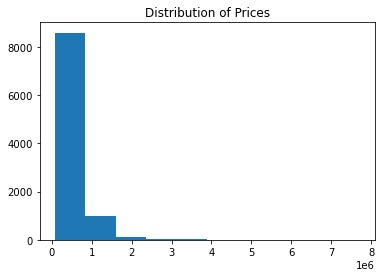

In [7150]:
plt.hist(train_data['price'])
plt.title("Distribution of Prices")

Text(0.5, 1.0, 'Distribution of Prices')

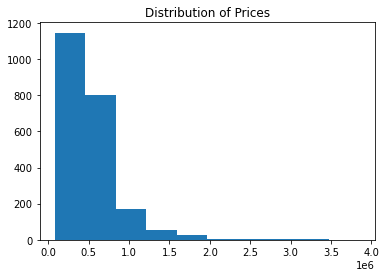

In [7151]:
plt.hist(test_data['price'])
plt.title("Distribution of Prices")

#### The price data is highly right-skewed i.e. mean price >> median price, as there are outliers in the very high end range

In [7152]:
test_data.describe().round()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
count,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0
mean,538643.0,3.0,2.0,2073.0,13555.0,1.0,0.0,0.0,3.0,8.0,1791.0,282.0,1971.0,86.0,98079.0,48.0,-122.0,1986.0,12148.0,2014.0
std,358422.0,1.0,1.0,897.0,29606.0,1.0,0.0,1.0,1.0,1.0,836.0,424.0,30.0,406.0,53.0,0.0,0.0,686.0,22905.0,0.0
min,83000.0,1.0,0.0,420.0,683.0,1.0,0.0,0.0,1.0,4.0,420.0,0.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,755.0,2014.0
25%,320000.0,3.0,1.0,1460.0,5000.0,1.0,0.0,0.0,3.0,7.0,1200.0,0.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5078.0,2014.0
50%,450000.0,3.0,2.0,1910.0,7526.0,1.0,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98070.0,48.0,-122.0,1830.0,7551.0,2014.0
75%,635000.0,4.0,2.0,2490.0,10464.0,2.0,0.0,0.0,4.0,8.0,2220.0,540.0,1997.0,0.0,98118.0,48.0,-122.0,2370.0,10000.0,2015.0
max,3850000.0,9.0,6.0,7850.0,435600.0,3.0,1.0,4.0,5.0,12.0,7850.0,2570.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,292645.0,2015.0


#### train data and test data are quite similar or consistent in the manner that the median/mean price is roughly the same and the distribution of price is also similar within the IQR ; 
#### Significant difference is in their max prices

<AxesSubplot:xlabel='price'>

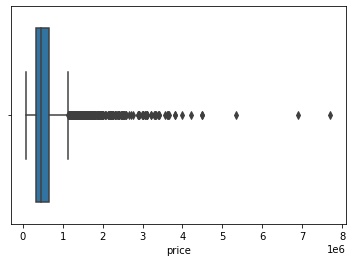

In [7153]:
sns.boxplot(train_data['price'])

<AxesSubplot:xlabel='price'>

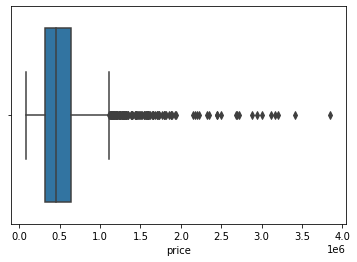

In [7154]:
sns.boxplot(test_data['price'])

In [7155]:
def find_outliers_IQR(df):

   q1=df.price.quantile(0.25)

   q3=df.price.quantile(0.75)

   IQR=q3-q1

   outliers = df[ (df.price<(q1-1.5*IQR)) | (df.price>(q3+1.5*IQR)) ]

   return outliers

find_outliers_IQR(train_data)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
1,2014-05-12,1225000.0,4,4,5420,101930,1,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
21,2015-03-11,1350000.0,3,2,2753,65005,1,1,2,5,...,2165,588,1953,0,98070,47.4041,-122.451,2680,72513,2015
29,2014-06-12,1325000.0,5,2,3200,20158,1,0,0,3,...,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158,2014
56,2015-03-02,1450000.0,4,2,2750,17789,1,0,0,3,...,1980,770,1914,1992,98004,47.6141,-122.212,3060,11275,2015
119,2015-05-04,2900000.0,4,3,5050,20100,1,0,2,3,...,4750,300,1982,2008,98004,47.6312,-122.223,3890,20060,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9732,2015-01-30,1700000.0,4,3,3830,8963,2,0,0,3,...,3120,710,2014,0,98004,47.5990,-122.197,2190,10777,2015
9736,2015-01-07,3567000.0,5,4,4850,10584,2,1,4,3,...,3540,1310,2007,0,98008,47.5943,-122.110,3470,18270,2015
9745,2014-05-14,1222500.0,4,3,4910,9444,1,0,0,3,...,3110,1800,2007,0,98074,47.6502,-122.066,4560,11063,2014
9752,2015-04-21,1575000.0,4,3,3410,10125,2,0,0,3,...,3410,0,2007,0,98040,47.5653,-122.223,2290,10125,2015


In [7156]:
train_data.sort_values(by='price').tail(5)
# train_data.sort_values(by='price').tail(5).grade

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
3956,2014-06-18,4489000.0,4,3,6430,27517,2,0,0,3,...,6430,0,2001,0,98004,47.6208,-122.219,3720,14592,2014
1216,2014-08-15,4500000.0,5,5,6640,40014,2,1,4,3,...,6350,290,2004,0,98155,47.7493,-122.280,3030,23408,2014
659,2015-04-13,5350000.0,5,5,8000,23985,2,0,4,3,...,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,2015
4235,2014-09-19,6885000.0,6,7,9890,31374,2,0,4,3,...,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,2014
3303,2014-10-13,7700000.0,6,8,12050,27600,2,0,3,4,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,2014


#### Not very significant / drastic features are there for the high end houses in the data, apart from their grade is very good.

In [7157]:
train_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
1,2014-05-12,1225000.0,4,4,5420,101930,1,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
2,2014-05-27,468000.0,2,1,1160,6000,1,0,0,4,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,2014
3,2014-05-28,310000.0,3,1,1430,19901,1,0,0,4,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,2014
4,2014-10-07,400000.0,3,1,1370,9680,1,0,0,4,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,2014


In [7158]:
find_outliers_IQR(test_data)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
45,2014-06-12,1485000.0,4,3,4030,10800,2,0,0,3,...,4030,0,2006,0,98033,47.6821,-122.196,2160,7200,2014
51,2014-10-13,1450000.0,3,3,4380,6320,2,0,3,5,...,3580,800,1952,0,98199,47.6452,-122.411,3080,7680,2014
69,2014-08-08,1578000.0,4,3,4670,51836,2,0,0,4,...,4670,0,1988,0,98005,47.6350,-122.164,4230,41075,2014
121,2014-12-22,1875000.0,5,3,4110,7920,2,0,3,3,...,3150,960,1921,0,98122,47.6170,-122.282,3890,7800,2014
140,2014-06-25,1229000.0,4,3,3770,37034,2,0,0,3,...,2830,940,1989,0,98007,47.6463,-122.151,3200,36342,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,2014-11-06,1275000.0,4,3,3530,8126,2,0,0,3,...,3530,0,2007,0,98033,47.6847,-122.200,2660,8126,2014
2137,2015-04-15,1940000.0,5,3,4230,16526,2,0,0,3,...,4230,0,2008,0,98004,47.5933,-122.199,3000,12362,2015
2194,2014-07-17,1174660.0,6,3,4310,7760,2,0,0,3,...,3260,1050,2013,0,98059,47.5297,-122.155,4620,10217,2014
2195,2014-09-23,1765000.0,4,3,3980,10249,2,0,0,3,...,3980,0,2011,0,98004,47.5873,-122.196,2450,10912,2014


In [7159]:
test_data.sort_values(by='price').tail(5)
# test_data.sort_values(by='price').tail(5).grade

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
1058,2014-11-24,3120000.0,3,3,4490,56609,2,1,4,3,...,4490,0,1993,0,98034,47.6997,-122.240,2710,51330,2014
1355,2014-08-28,3168750.0,5,3,4330,11979,1,0,4,3,...,2090,2240,2008,0,98004,47.6251,-122.218,4320,12000,2014
2067,2014-08-26,3204000.0,4,4,4810,18851,2,0,3,3,...,4810,0,2007,0,98004,47.6364,-122.214,3970,19929,2014
602,2014-10-07,3418800.0,5,5,5450,20412,2,0,0,3,...,5450,0,2014,0,98039,47.6209,-122.237,3160,17825,2014
196,2014-11-14,3850000.0,4,4,5770,21300,2,1,4,4,...,5770,0,1980,0,98040,47.5850,-122.222,4620,22748,2014


In [7160]:
test_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2015-03-12,323000.0,3,2,1890,6560,2,0,0,3,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015
1,2015-03-12,530000.0,5,2,1810,4850,1,0,0,3,...,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,2015
2,2014-12-05,189000.0,2,1,1200,9850,1,0,0,4,...,1200,0,1921,0,98002,47.3089,-122.210,1060,5095,2014
3,2014-06-24,687500.0,4,1,2330,5000,1,0,0,4,...,1510,820,1929,0,98117,47.6823,-122.368,1460,5000,2014
4,2015-02-13,240000.0,4,1,1220,8075,1,0,0,2,...,890,330,1969,0,98001,47.3341,-122.282,1290,7800,2015


In [7161]:
train_data[['price']].value_counts()

price    
450000.0     77
550000.0     76
350000.0     76
375000.0     69
250000.0     66
             ..
448500.0      1
446950.0      1
446800.0      1
446250.0      1
7700000.0     1
Length: 2533, dtype: int64

In [7162]:
test_data[['price']].value_counts()

price    
500000.0     20
400000.0     19
425000.0     18
350000.0     18
600000.0     18
             ..
432000.0      1
432500.0      1
433500.0      1
437500.0      1
3850000.0     1
Length: 1013, dtype: int64

In [7163]:
# log transform the price variable
train_data['price'] = np.log(train_data['price'])

In [7164]:
df_out_tr = find_outliers_IQR(train_data).index

In [7165]:
train_data.drop(df_out_tr, inplace=True)

In [7166]:
train_data.reset_index(drop=True)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2014-12-09,13.311329,4,3,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
1,2014-05-12,14.018451,4,4,5420,101930,1,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
2,2014-05-27,13.056224,2,1,1160,6000,1,0,0,4,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,2014
3,2014-05-28,12.644328,3,1,1430,19901,1,0,0,4,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,2014
4,2014-10-07,12.899220,3,1,1370,9680,1,0,0,4,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9608,2015-01-26,12.969212,3,2,1490,1126,3,0,0,3,...,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,2015
9609,2014-10-14,13.322337,4,2,2520,6023,2,0,0,3,...,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,2014
9610,2015-03-26,13.822983,4,3,3510,7200,2,0,0,3,...,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,2015
9611,2014-06-23,12.904459,2,0,1020,1350,2,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014


<AxesSubplot:xlabel='price'>

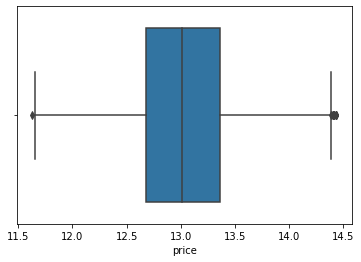

In [7167]:
sns.boxplot(train_data['price'])

In [7168]:
test_data['price'] = np.log(test_data['price'])

<AxesSubplot:xlabel='price'>

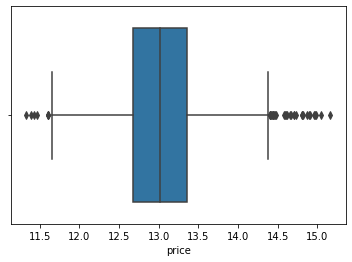

In [7169]:
sns.boxplot(test_data['price'])

In [7170]:
df_out_ts = find_outliers_IQR(test_data).index

In [7171]:
test_data.drop(df_out_ts, inplace=True)

In [7172]:
test_data.reset_index(drop=True)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2015-03-12,12.685408,3,2,1890,6560,2,0,0,3,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015
1,2015-03-12,13.180632,5,2,1810,4850,1,0,0,3,...,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,2015
2,2014-12-05,12.149502,2,1,1200,9850,1,0,0,4,...,1200,0,1921,0,98002,47.3089,-122.210,1060,5095,2014
3,2014-06-24,13.440817,4,1,2330,5000,1,0,0,4,...,1510,820,1929,0,98117,47.6823,-122.368,1460,5000,2014
4,2015-02-13,12.388394,4,1,1220,8075,1,0,0,2,...,890,330,1969,0,98001,47.3341,-122.282,1290,7800,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175,2014-12-15,12.911642,4,2,1980,5020,2,0,0,3,...,1980,0,2007,0,98056,47.5147,-122.190,1980,5064,2014
2176,2014-08-08,12.868761,3,2,2198,6222,2,0,2,3,...,2198,0,2010,0,98198,47.3906,-122.304,2198,7621,2014
2177,2015-05-02,13.318752,4,3,2850,5577,2,0,0,3,...,1950,900,2014,0,98056,47.5252,-122.192,2850,5708,2015
2178,2014-07-07,12.345835,3,1,1140,1201,2,0,0,3,...,1140,0,2014,0,98108,47.5637,-122.295,1210,1552,2014


<AxesSubplot:xlabel='price'>

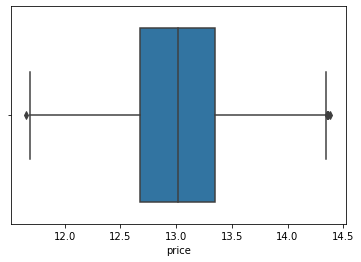

In [7173]:
sns.boxplot(test_data['price'])

In [7174]:
import numpy as np
test_data['price'] = np.exp(test_data['price'])

Text(0.5, 1.0, 'No of Bedrooms count')

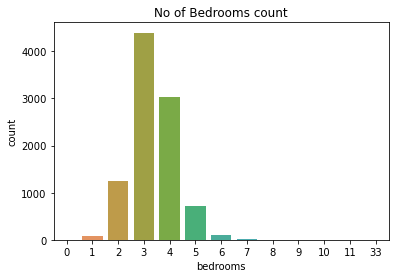

In [7175]:
sns.countplot(train_data.bedrooms);
plt.title("No of Bedrooms count")

REMOVING INCONSISTENT DATA

In [7176]:
train_bd_2 = train_data[train_data['bedrooms'] == 0].index # -> Optional to remove
train_bd = train_data[train_data['bedrooms'] == 33].index # -> only one record
train_bd

Int64Index([7204], dtype='int64')

In [7177]:
train_data.drop(train_bd, inplace=True)

In [7178]:
train_data.reset_index(drop=True)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2014-12-09,13.311329,4,3,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
1,2014-05-12,14.018451,4,4,5420,101930,1,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
2,2014-05-27,13.056224,2,1,1160,6000,1,0,0,4,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,2014
3,2014-05-28,12.644328,3,1,1430,19901,1,0,0,4,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,2014
4,2014-10-07,12.899220,3,1,1370,9680,1,0,0,4,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,2015-01-26,12.969212,3,2,1490,1126,3,0,0,3,...,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,2015
9608,2014-10-14,13.322337,4,2,2520,6023,2,0,0,3,...,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,2014
9609,2015-03-26,13.822983,4,3,3510,7200,2,0,0,3,...,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,2015
9610,2014-06-23,12.904459,2,0,1020,1350,2,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014


In [7179]:
train_data.drop(train_bd_2, inplace=True)

In [7180]:
train_data.reset_index(drop=True)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2014-12-09,13.311329,4,3,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
1,2014-05-12,14.018451,4,4,5420,101930,1,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
2,2014-05-27,13.056224,2,1,1160,6000,1,0,0,4,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,2014
3,2014-05-28,12.644328,3,1,1430,19901,1,0,0,4,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,2014
4,2014-10-07,12.899220,3,1,1370,9680,1,0,0,4,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9601,2015-01-26,12.969212,3,2,1490,1126,3,0,0,3,...,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,2015
9602,2014-10-14,13.322337,4,2,2520,6023,2,0,0,3,...,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,2014
9603,2015-03-26,13.822983,4,3,3510,7200,2,0,0,3,...,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,2015
9604,2014-06-23,12.904459,2,0,1020,1350,2,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014


Text(0.5, 1.0, 'No of Bedrooms count')

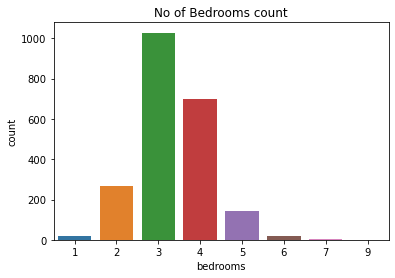

In [7181]:
sns.countplot(test_data.bedrooms);
plt.title("No of Bedrooms count")

Text(0.5, 1.0, 'No of bathroom Counts')

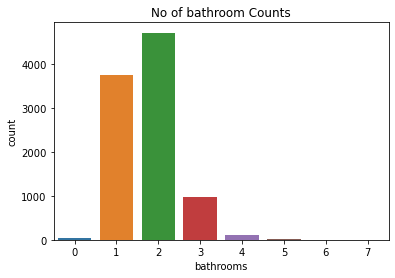

In [7182]:
sns.countplot(train_data.bathrooms);
plt.title('No of bathroom Counts')

In [7183]:
train_bt = train_data[train_data['bathrooms'] == 0].index
train_data.drop(train_bt, inplace=True)

In [7184]:
train_data.reset_index(drop=True)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2014-12-09,13.311329,4,3,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
1,2014-05-12,14.018451,4,4,5420,101930,1,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
2,2014-05-27,13.056224,2,1,1160,6000,1,0,0,4,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,2014
3,2014-05-28,12.644328,3,1,1430,19901,1,0,0,4,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,2014
4,2014-10-07,12.899220,3,1,1370,9680,1,0,0,4,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9567,2014-10-15,14.245343,5,3,4470,8088,2,0,0,3,...,4470,0,2008,0,98004,47.6321,-122.200,2780,8964,2014
9568,2014-08-25,13.136759,3,2,2270,5536,2,0,0,3,...,2270,0,2003,0,98065,47.5389,-121.881,2270,5731,2014
9569,2015-01-26,12.969212,3,2,1490,1126,3,0,0,3,...,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,2015
9570,2014-10-14,13.322337,4,2,2520,6023,2,0,0,3,...,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,2014


Text(0.5, 1.0, 'No of bathroom Counts')

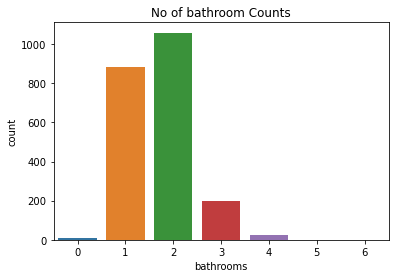

In [7185]:
sns.countplot(test_data.bathrooms);
plt.title('No of bathroom Counts')

In [7186]:
test_bt = test_data[test_data['bathrooms'] == 0].index
test_data.drop(test_bt, inplace=True)

In [7187]:
test_data.reset_index(drop=True)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2015-03-12,323000.0,3,2,1890,6560,2,0,0,3,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015
1,2015-03-12,530000.0,5,2,1810,4850,1,0,0,3,...,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,2015
2,2014-12-05,189000.0,2,1,1200,9850,1,0,0,4,...,1200,0,1921,0,98002,47.3089,-122.210,1060,5095,2014
3,2014-06-24,687500.0,4,1,2330,5000,1,0,0,4,...,1510,820,1929,0,98117,47.6823,-122.368,1460,5000,2014
4,2015-02-13,240000.0,4,1,1220,8075,1,0,0,2,...,890,330,1969,0,98001,47.3341,-122.282,1290,7800,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,2014-12-15,405000.0,4,2,1980,5020,2,0,0,3,...,1980,0,2007,0,98056,47.5147,-122.190,1980,5064,2014
2166,2014-08-08,388000.0,3,2,2198,6222,2,0,2,3,...,2198,0,2010,0,98198,47.3906,-122.304,2198,7621,2014
2167,2015-05-02,608500.0,4,3,2850,5577,2,0,0,3,...,1950,900,2014,0,98056,47.5252,-122.192,2850,5708,2015
2168,2014-07-07,230000.0,3,1,1140,1201,2,0,0,3,...,1140,0,2014,0,98108,47.5637,-122.295,1210,1552,2014


Text(0.5, 1.0, 'Number of Floors')

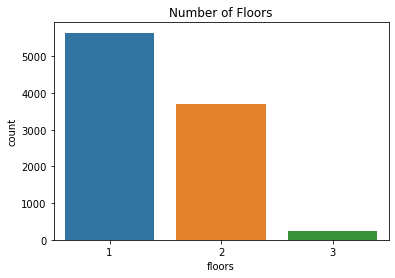

In [7188]:
sns.countplot(train_data.floors,order=train_data.floors.value_counts().index);
plt.title("Number of Floors")

Text(0.5, 1.0, 'Number of Floors')

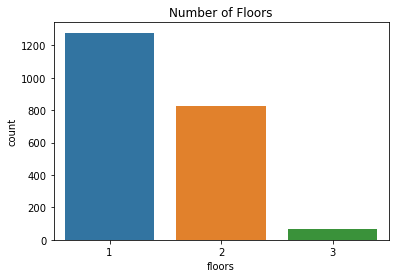

In [7189]:
sns.countplot(test_data.floors,order=test_data.floors.value_counts().index);
plt.title("Number of Floors")

In [7190]:
train_data[['view']].value_counts()

view
0       8642
2        440
3        226
1        150
4        114
dtype: int64

In [7191]:
test_data[['view']].value_counts()

view
0       1976
2         89
3         51
1         32
4         22
dtype: int64

In [7192]:
train_data[['waterfront']].value_counts()

waterfront
0             9524
1               48
dtype: int64

In [7193]:
test_data[['waterfront']].value_counts()

waterfront
0             2162
1                8
dtype: int64

In [7194]:
train_data[['condition']].value_counts()

condition
3            6178
4            2566
5             748
2              72
1               8
dtype: int64

In [7195]:
test_data[['condition']].value_counts()

condition
3            1405
4             554
5             187
2              21
1               3
dtype: int64

Text(0.5, 1.0, 'Types of Grades')

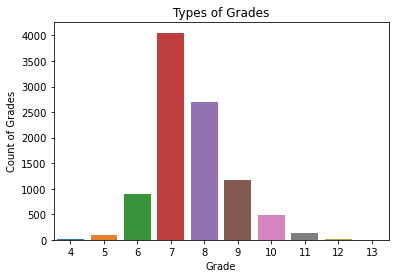

In [7196]:
from collections import Counter
sns.barplot(list(Counter(train_data.grade).keys()),list(Counter(train_data.grade).values()));
plt.xlabel("Grade");
plt.ylabel("Count of Grades");
plt.title("Types of Grades")

In [7197]:
train_data.grade.value_counts()

7     4053
8     2700
9     1178
6      893
10     492
11     130
5       94
12      25
4        6
13       1
Name: grade, dtype: int64

In [7198]:
train_data[train_data.grade == 1]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold


Text(0.5, 1.0, 'Types of Grades')

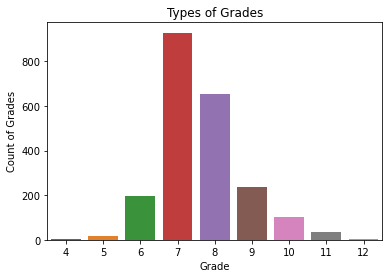

In [7199]:
sns.barplot(list(Counter(test_data.grade).keys()),list(Counter(test_data.grade).values()));
plt.xlabel("Grade");
plt.ylabel("Count of Grades");
plt.title("Types of Grades")

In [7200]:
test_data.grade.value_counts().sort_index()

4       2
5      16
6     197
7     929
8     652
9     236
10    102
11     33
12      3
Name: grade, dtype: int64

In [7203]:
train_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2014-12-09,13.311329,4,3,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
1,2014-05-12,14.018451,4,4,5420,101930,1,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
2,2014-05-27,13.056224,2,1,1160,6000,1,0,0,4,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,2014
3,2014-05-28,12.644328,3,1,1430,19901,1,0,0,4,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,2014
4,2014-10-07,12.899220,3,1,1370,9680,1,0,0,4,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,2014


### Bivariate

In [7212]:
train_data.corr()['price']

price            1.000000
bedrooms         0.322191
bathrooms        0.443501
sqft_living      0.662047
sqft_lot         0.108499
floors           0.280675
waterfront       0.106820
view             0.304970
condition        0.035658
grade            0.672572
sqft_above       0.565927
sqft_basement    0.279699
yr_built         0.074800
yr_renovated     0.099631
zipcode         -0.025662
lat              0.459455
long             0.064458
sqft_living15    0.598419
sqft_lot15       0.094760
yr_sold          0.018268
Name: price, dtype: float64

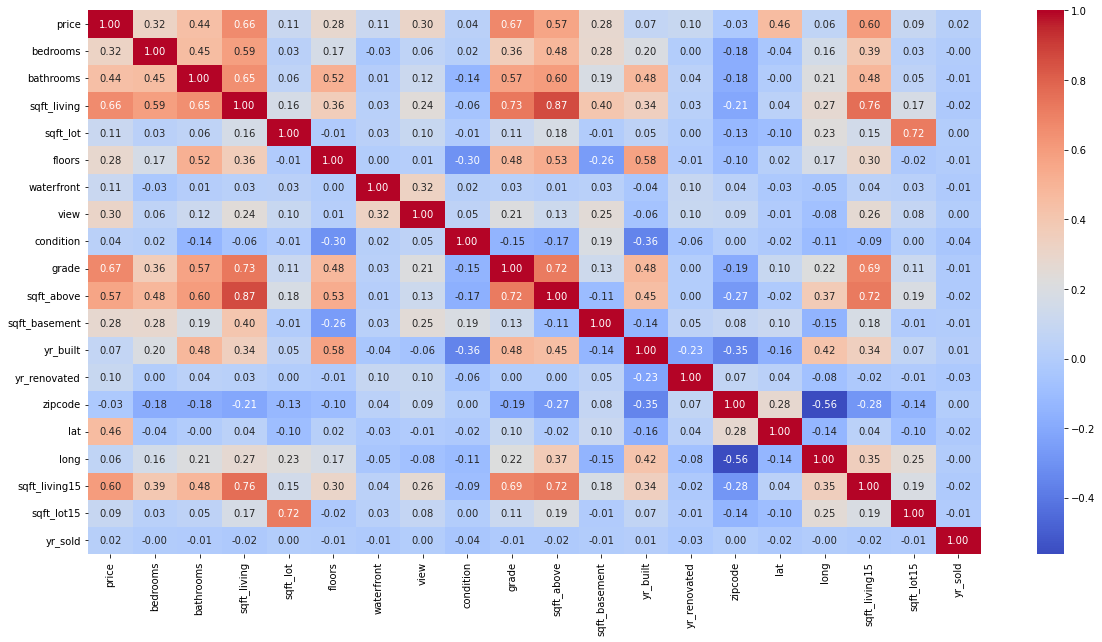

In [7213]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train_data.corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f")
plt.savefig('chart1', dpi=400)

In [7214]:
# fig, ax = plt.subplots(figsize=(20,10))
# sns.heatmap(test_data.corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f")
# plt.savefig('chart1', dpi=400)

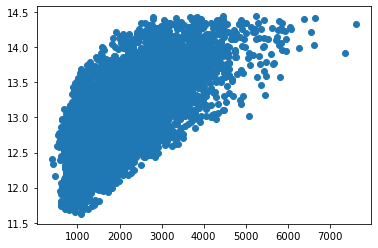

In [7215]:
plt.scatter( x = train_data.sqft_living, y = train_data.price)

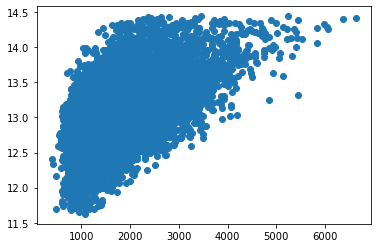

In [7216]:
plt.scatter( x = train_data.sqft_above, y = train_data.price)

#### Dropping date column

In [7217]:
train_data = train_data.drop('date', axis=1)
test_data = test_data.drop('date', axis=1)

#### Adding new feature -> Sales Age

In [7218]:
train_data['sales_age'] = train_data.yr_sold - train_data.yr_built

In [7219]:
test_data['sales_age'] = test_data.yr_sold - test_data.yr_built

###### Removing negative sales age

In [7220]:
train_age_1 = train_data[train_data['sales_age'] < 0].index
train_data.drop(train_age_1, inplace=True)

In [7221]:
train_data = train_data.reset_index(drop=True)

In [7222]:
test_age_1 = test_data[test_data['sales_age'] < 0].index
test_data.drop(test_age_1, inplace=True)

In [7223]:
test_data = test_data.reset_index(drop=True)

In [7224]:
train_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,sales_age
0,13.311329,1.386294,1.098612,1960,5000,1,0,0,5,1.945910,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
1,14.018451,1.386294,1.386294,5420,101930,1,0,0,3,2.397895,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,13
2,13.056224,0.693147,0.000000,1160,6000,1,0,0,4,1.945910,...,300,1942,0,98115,47.6900,-122.292,1330,6000,2014,72
3,12.644328,1.098612,0.000000,1430,19901,1,0,0,4,1.945910,...,0,1927,0,98028,47.7558,-122.229,1780,12697,2014,87
4,12.899220,1.098612,0.000000,1370,9680,1,0,0,4,1.945910,...,0,1977,0,98074,47.6127,-122.045,1370,10208,2014,37


#### Dropping yr_built and yr_sold

In [7244]:
train_data.drop('yr_built',axis=1,inplace=True)
train_data.drop('yr_sold',axis=1,inplace=True)
test_data.drop('yr_built',axis=1,inplace=True)
test_data.drop('yr_sold',axis=1,inplace=True)

In [7245]:
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [7246]:
train_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_age
0,13.311329,1.386294,1.098612,1960,5000,1,0,0,5,1.945910,1050,910,0,98136,47.5208,-122.393,1360,5000,49
1,14.018451,1.386294,1.386294,5420,101930,1,0,0,3,2.397895,3890,1530,0,98053,47.6561,-122.005,4760,101930,13
2,13.056224,0.693147,0.000000,1160,6000,1,0,0,4,1.945910,860,300,0,98115,47.6900,-122.292,1330,6000,72
3,12.644328,1.098612,0.000000,1430,19901,1,0,0,4,1.945910,1430,0,0,98028,47.7558,-122.229,1780,12697,87
4,12.899220,1.098612,0.000000,1370,9680,1,0,0,4,1.945910,1370,0,0,98074,47.6127,-122.045,1370,10208,37


In [7250]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9567 entries, 0 to 9566
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          9567 non-null   float64
 1   bedrooms       9567 non-null   float64
 2   bathrooms      9567 non-null   float64
 3   sqft_living    9567 non-null   int64  
 4   sqft_lot       9567 non-null   int64  
 5   floors         9567 non-null   int64  
 6   waterfront     9567 non-null   int64  
 7   view           9567 non-null   int64  
 8   condition      9567 non-null   int64  
 9   grade          9567 non-null   float64
 10  sqft_above     9567 non-null   int64  
 11  sqft_basement  9567 non-null   int64  
 12  yr_renovated   9567 non-null   int64  
 13  zipcode        9567 non-null   int64  
 14  lat            9567 non-null   float64
 15  long           9567 non-null   float64
 16  sqft_living15  9567 non-null   int64  
 17  sqft_lot15     9567 non-null   int64  
 18  sales_ag

In [7252]:
train_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_age
0,13.311329,1.386294,1.098612,1960,5000,1,0,0,5,1.945910,1050,910,0,98136,47.5208,-122.393,1360,5000,49
1,14.018451,1.386294,1.386294,5420,101930,1,0,0,3,2.397895,3890,1530,0,98053,47.6561,-122.005,4760,101930,13
2,13.056224,0.693147,0.000000,1160,6000,1,0,0,4,1.945910,860,300,0,98115,47.6900,-122.292,1330,6000,72
3,12.644328,1.098612,0.000000,1430,19901,1,0,0,4,1.945910,1430,0,0,98028,47.7558,-122.229,1780,12697,87
4,12.899220,1.098612,0.000000,1370,9680,1,0,0,4,1.945910,1370,0,0,98074,47.6127,-122.045,1370,10208,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9562,14.245343,1.609438,1.098612,4470,8088,2,0,0,3,2.397895,4470,0,0,98004,47.6321,-122.200,2780,8964,6
9563,13.136759,1.098612,0.693147,2270,5536,2,0,0,3,2.079442,2270,0,0,98065,47.5389,-121.881,2270,5731,11
9564,12.969212,1.098612,0.693147,1490,1126,3,0,0,3,2.079442,1490,0,0,98144,47.5699,-122.288,1400,1230,1
9565,13.322337,1.386294,0.693147,2520,6023,2,0,0,3,2.197225,2520,0,0,98056,47.5137,-122.167,2520,6023,0


In [7254]:
train_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_age
0,13.311329,1.386294,1.098612,1960,5000,1,0,0,5,1.945910,1050,910,0,98136,47.5208,-122.393,1360,5000,49
1,14.018451,1.386294,1.386294,5420,101930,1,0,0,3,2.397895,3890,1530,0,98053,47.6561,-122.005,4760,101930,13
2,13.056224,0.693147,0.000000,1160,6000,1,0,0,4,1.945910,860,300,0,98115,47.6900,-122.292,1330,6000,72
3,12.644328,1.098612,0.000000,1430,19901,1,0,0,4,1.945910,1430,0,0,98028,47.7558,-122.229,1780,12697,87
4,12.899220,1.098612,0.000000,1370,9680,1,0,0,4,1.945910,1370,0,0,98074,47.6127,-122.045,1370,10208,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9562,14.245343,1.609438,1.098612,4470,8088,2,0,0,3,2.397895,4470,0,0,98004,47.6321,-122.200,2780,8964,6
9563,13.136759,1.098612,0.693147,2270,5536,2,0,0,3,2.079442,2270,0,0,98065,47.5389,-121.881,2270,5731,11
9564,12.969212,1.098612,0.693147,1490,1126,3,0,0,3,2.079442,1490,0,0,98144,47.5699,-122.288,1400,1230,1
9565,13.322337,1.386294,0.693147,2520,6023,2,0,0,3,2.197225,2520,0,0,98056,47.5137,-122.167,2520,6023,0


In [7256]:
train_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_age
0,13.311329,1.386294,1.098612,1960,5000,1,0,0,5,1.945910,1050,910,0,98136,47.5208,-122.393,1360,5000,49
1,14.018451,1.386294,1.386294,5420,101930,1,0,0,3,2.397895,3890,1530,0,98053,47.6561,-122.005,4760,101930,13
2,13.056224,0.693147,0.000000,1160,6000,1,0,0,4,1.945910,860,300,0,98115,47.6900,-122.292,1330,6000,72
3,12.644328,1.098612,0.000000,1430,19901,1,0,0,4,1.945910,1430,0,0,98028,47.7558,-122.229,1780,12697,87
4,12.899220,1.098612,0.000000,1370,9680,1,0,0,4,1.945910,1370,0,0,98074,47.6127,-122.045,1370,10208,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9562,14.245343,1.609438,1.098612,4470,8088,2,0,0,3,2.397895,4470,0,0,98004,47.6321,-122.200,2780,8964,6
9563,13.136759,1.098612,0.693147,2270,5536,2,0,0,3,2.079442,2270,0,0,98065,47.5389,-121.881,2270,5731,11
9564,12.969212,1.098612,0.693147,1490,1126,3,0,0,3,2.079442,1490,0,0,98144,47.5699,-122.288,1400,1230,1
9565,13.322337,1.386294,0.693147,2520,6023,2,0,0,3,2.197225,2520,0,0,98056,47.5137,-122.167,2520,6023,0


In [7259]:
train_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_age
0,13.311329,1.386294,1.098612,1960,5000,1,0,0,5,1.945910,1050,910,0,98136,47.5208,-122.393,1360,5000,49
1,14.018451,1.386294,1.386294,5420,101930,1,0,0,3,2.397895,3890,1530,0,98053,47.6561,-122.005,4760,101930,13
2,13.056224,0.693147,0.000000,1160,6000,1,0,0,4,1.945910,860,300,0,98115,47.6900,-122.292,1330,6000,72
3,12.644328,1.098612,0.000000,1430,19901,1,0,0,4,1.945910,1430,0,0,98028,47.7558,-122.229,1780,12697,87
4,12.899220,1.098612,0.000000,1370,9680,1,0,0,4,1.945910,1370,0,0,98074,47.6127,-122.045,1370,10208,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9562,14.245343,1.609438,1.098612,4470,8088,2,0,0,3,2.397895,4470,0,0,98004,47.6321,-122.200,2780,8964,6
9563,13.136759,1.098612,0.693147,2270,5536,2,0,0,3,2.079442,2270,0,0,98065,47.5389,-121.881,2270,5731,11
9564,12.969212,1.098612,0.693147,1490,1126,3,0,0,3,2.079442,1490,0,0,98144,47.5699,-122.288,1400,1230,1
9565,13.322337,1.386294,0.693147,2520,6023,2,0,0,3,2.197225,2520,0,0,98056,47.5137,-122.167,2520,6023,0


In [7262]:
train_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_age
0,13.311329,1.386294,1.098612,1960,5000,1,0,0,5,1.945910,1050,910,0,98136,47.5208,-122.393,1360,5000,49
1,14.018451,1.386294,1.386294,5420,101930,1,0,0,3,2.397895,3890,1530,0,98053,47.6561,-122.005,4760,101930,13
2,13.056224,0.693147,0.000000,1160,6000,1,0,0,4,1.945910,860,300,0,98115,47.6900,-122.292,1330,6000,72
3,12.644328,1.098612,0.000000,1430,19901,1,0,0,4,1.945910,1430,0,0,98028,47.7558,-122.229,1780,12697,87
4,12.899220,1.098612,0.000000,1370,9680,1,0,0,4,1.945910,1370,0,0,98074,47.6127,-122.045,1370,10208,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9562,14.245343,1.609438,1.098612,4470,8088,2,0,0,3,2.397895,4470,0,0,98004,47.6321,-122.200,2780,8964,6
9563,13.136759,1.098612,0.693147,2270,5536,2,0,0,3,2.079442,2270,0,0,98065,47.5389,-121.881,2270,5731,11
9564,12.969212,1.098612,0.693147,1490,1126,3,0,0,3,2.079442,1490,0,0,98144,47.5699,-122.288,1400,1230,1
9565,13.322337,1.386294,0.693147,2520,6023,2,0,0,3,2.197225,2520,0,0,98056,47.5137,-122.167,2520,6023,0


In [7266]:
train_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_age
0,13.311329,1.386294,1.098612,1960,5000,1,0,0,5,1.945910,1050,910,0,98136,47.5208,-122.393,1360,5000,49
1,14.018451,1.386294,1.386294,5420,101930,1,0,0,3,2.397895,3890,1530,0,98053,47.6561,-122.005,4760,101930,13
2,13.056224,0.693147,0.000000,1160,6000,1,0,0,4,1.945910,860,300,0,98115,47.6900,-122.292,1330,6000,72
3,12.644328,1.098612,0.000000,1430,19901,1,0,0,4,1.945910,1430,0,0,98028,47.7558,-122.229,1780,12697,87
4,12.899220,1.098612,0.000000,1370,9680,1,0,0,4,1.945910,1370,0,0,98074,47.6127,-122.045,1370,10208,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9562,14.245343,1.609438,1.098612,4470,8088,2,0,0,3,2.397895,4470,0,0,98004,47.6321,-122.200,2780,8964,6
9563,13.136759,1.098612,0.693147,2270,5536,2,0,0,3,2.079442,2270,0,0,98065,47.5389,-121.881,2270,5731,11
9564,12.969212,1.098612,0.693147,1490,1126,3,0,0,3,2.079442,1490,0,0,98144,47.5699,-122.288,1400,1230,1
9565,13.322337,1.386294,0.693147,2520,6023,2,0,0,3,2.197225,2520,0,0,98056,47.5137,-122.167,2520,6023,0


### OLS

#### For Feature Selection :-
- Removing the insignificant variables, based on their importance

ITERATION 1

In [7269]:
import statsmodels.api as sm

#define response variable
y = train_data.price

#define explanatory variable
x = train_data.iloc[:, 1:]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1693.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:50:34   Log-Likelihood:                -137.70
No. Observations:                9567   AIC:                             311.4
Df Residuals:                    9549   BIC:                             440.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -16.3859      5.336     -3.071

In [7270]:
train_data.drop('bedrooms', axis=1, inplace=True)

In [7271]:
train_data = train_data.reset_index(drop=True)

In [7272]:
test_data.drop('bedrooms', axis=1, inplace=True)

In [7273]:
test_data = test_data.reset_index(drop=True)

ITERATION 2

In [7274]:
import statsmodels.api as sm

#define response variable
y = train_data.price

#define explanatory variable
x = train_data.iloc[:, 1:]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1798.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:50:34   Log-Likelihood:                -139.66
No. Observations:                9567   AIC:                             313.3
Df Residuals:                    9550   BIC:                             435.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -17.1347      5.324     -3.219

In [7275]:
train_data.drop('sqft_lot15', axis=1, inplace=True)

In [7276]:
train_data = train_data.reset_index(drop=True)

In [7277]:
test_data.drop('sqft_lot15', axis=1, inplace=True)

In [7278]:
test_data = test_data.reset_index(drop=True)

ITERATION 3

In [7279]:
import statsmodels.api as sm

#define response variable
y = train_data.price

#define explanatory variable
x = train_data.iloc[:, 1:]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1918.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        20:50:34   Log-Likelihood:                -140.69
No. Observations:                9567   AIC:                             313.4
Df Residuals:                    9551   BIC:                             428.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -17.3125      5.323     -3.253

In [7280]:
train_data

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sales_age
0,13.311329,1.098612,1960,5000,1,0,0,5,1.945910,1050,910,0,98136,47.5208,-122.393,1360,49
1,14.018451,1.386294,5420,101930,1,0,0,3,2.397895,3890,1530,0,98053,47.6561,-122.005,4760,13
2,13.056224,0.000000,1160,6000,1,0,0,4,1.945910,860,300,0,98115,47.6900,-122.292,1330,72
3,12.644328,0.000000,1430,19901,1,0,0,4,1.945910,1430,0,0,98028,47.7558,-122.229,1780,87
4,12.899220,0.000000,1370,9680,1,0,0,4,1.945910,1370,0,0,98074,47.6127,-122.045,1370,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9562,14.245343,1.098612,4470,8088,2,0,0,3,2.397895,4470,0,0,98004,47.6321,-122.200,2780,6
9563,13.136759,0.693147,2270,5536,2,0,0,3,2.079442,2270,0,0,98065,47.5389,-121.881,2270,11
9564,12.969212,0.693147,1490,1126,3,0,0,3,2.079442,1490,0,0,98144,47.5699,-122.288,1400,1
9565,13.322337,0.693147,2520,6023,2,0,0,3,2.197225,2520,0,0,98056,47.5137,-122.167,2520,0


In [7282]:
test_data

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sales_age
0,323000.0,1.414214,1890,6560,2,0,0,3,2.645751,1890,0,0,98038,47.3684,-122.031,2390,12
1,530000.0,1.414214,1810,4850,1,0,0,3,2.645751,1810,0,0,98107,47.6700,-122.394,1360,115
2,189000.0,1.000000,1200,9850,1,0,0,4,2.645751,1200,0,0,98002,47.3089,-122.210,1060,93
3,687500.0,1.000000,2330,5000,1,0,0,4,2.645751,1510,820,0,98117,47.6823,-122.368,1460,85
4,240000.0,1.000000,1220,8075,1,0,0,2,2.645751,890,330,0,98001,47.3341,-122.282,1290,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,405000.0,1.414214,1980,5020,2,0,0,3,2.645751,1980,0,0,98056,47.5147,-122.190,1980,7
2165,388000.0,1.414214,2198,6222,2,0,2,3,2.828427,2198,0,0,98198,47.3906,-122.304,2198,4
2166,608500.0,1.732051,2850,5577,2,0,0,3,2.828427,1950,900,0,98056,47.5252,-122.192,2850,1
2167,230000.0,1.000000,1140,1201,2,0,0,3,2.828427,1140,0,0,98108,47.5637,-122.295,1210,0


In [7283]:
# !pip install mlxtend

In [7284]:
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score

# lreg = LinearRegression()

In [7285]:
# sfs1 = sfs(lreg, forward=False, k_features=14, scoring='neg_root_mean_squared_error')
# sfs1 = sfs1.fit(train_data.iloc[:, 1:], train_data.price)
# feat_names = list(sfs1.k_feature_names_)
# print(feat_names)

In [7286]:
# new_data = train_data[feat_names]
# new_data.head()

In [7290]:
test_data

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sales_age
0,323000.0,1.414214,1890,6560,2,0,0,3,2.645751,1890,0,0,98038,47.3684,-122.031,2390,12
1,530000.0,1.414214,1810,4850,1,0,0,3,2.645751,1810,0,0,98107,47.6700,-122.394,1360,115
2,189000.0,1.000000,1200,9850,1,0,0,4,2.645751,1200,0,0,98002,47.3089,-122.210,1060,93
3,687500.0,1.000000,2330,5000,1,0,0,4,2.645751,1510,820,0,98117,47.6823,-122.368,1460,85
4,240000.0,1.000000,1220,8075,1,0,0,2,2.645751,890,330,0,98001,47.3341,-122.282,1290,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,405000.0,1.414214,1980,5020,2,0,0,3,2.645751,1980,0,0,98056,47.5147,-122.190,1980,7
2165,388000.0,1.414214,2198,6222,2,0,2,3,2.828427,2198,0,0,98198,47.3906,-122.304,2198,4
2166,608500.0,1.732051,2850,5577,2,0,0,3,2.828427,1950,900,0,98056,47.5252,-122.192,2850,1
2167,230000.0,1.000000,1140,1201,2,0,0,3,2.828427,1140,0,0,98108,47.5637,-122.295,1210,0


In [7291]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
tr_norm = scaler.fit_transform(train_data.loc[:, train_data.columns != 'price'].values)
tr_norm = pd.DataFrame(tr_norm, columns=train_data.columns[1:])

In [7292]:
train_data = train_data[['price']].join(tr_norm)

In [7293]:
train_data

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sales_age
0,13.311329,0.564575,0.217151,0.002714,0.0,0.0,0.0,1.00,0.474792,0.1056,0.334559,0.0,0.681818,0.586939,0.101255,0.143133,0.426087
1,14.018451,0.712414,0.695712,0.061429,0.0,0.0,0.0,0.50,0.858267,0.5600,0.562500,0.0,0.262626,0.804568,0.425941,0.800774,0.113043
2,13.056224,0.000000,0.106501,0.003320,0.0,0.0,0.0,0.75,0.474792,0.0752,0.110294,0.0,0.575758,0.859096,0.185774,0.137331,0.626087
3,12.644328,0.000000,0.143845,0.011740,0.0,0.0,0.0,0.75,0.474792,0.1664,0.000000,0.0,0.136364,0.964935,0.238494,0.224371,0.756522
4,12.899220,0.000000,0.135546,0.005549,0.0,0.0,0.0,0.75,0.474792,0.1568,0.000000,0.0,0.368687,0.734760,0.392469,0.145068,0.321739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9562,14.245343,0.564575,0.564315,0.004584,0.5,0.0,0.0,0.50,0.858267,0.6528,0.000000,0.0,0.015152,0.765964,0.262762,0.417795,0.052174
9563,13.136759,0.356207,0.260028,0.003038,0.5,0.0,0.0,0.50,0.588083,0.3008,0.000000,0.0,0.323232,0.616053,0.529707,0.319149,0.095652
9564,12.969212,0.356207,0.152144,0.000367,1.0,0.0,0.0,0.50,0.588083,0.1760,0.000000,0.0,0.722222,0.665916,0.189121,0.150870,0.008696
9565,13.322337,0.356207,0.294606,0.003333,0.5,0.0,0.0,0.50,0.688013,0.3408,0.000000,0.0,0.277778,0.575519,0.290377,0.367505,0.000000


In [7294]:
test_data

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sales_age
0,323000.0,1.414214,1890,6560,2,0,0,3,2.645751,1890,0,0,98038,47.3684,-122.031,2390,12
1,530000.0,1.414214,1810,4850,1,0,0,3,2.645751,1810,0,0,98107,47.6700,-122.394,1360,115
2,189000.0,1.000000,1200,9850,1,0,0,4,2.645751,1200,0,0,98002,47.3089,-122.210,1060,93
3,687500.0,1.000000,2330,5000,1,0,0,4,2.645751,1510,820,0,98117,47.6823,-122.368,1460,85
4,240000.0,1.000000,1220,8075,1,0,0,2,2.645751,890,330,0,98001,47.3341,-122.282,1290,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,405000.0,1.414214,1980,5020,2,0,0,3,2.645751,1980,0,0,98056,47.5147,-122.190,1980,7
2165,388000.0,1.414214,2198,6222,2,0,2,3,2.828427,2198,0,0,98198,47.3906,-122.304,2198,4
2166,608500.0,1.732051,2850,5577,2,0,0,3,2.828427,1950,900,0,98056,47.5252,-122.192,2850,1
2167,230000.0,1.000000,1140,1201,2,0,0,3,2.828427,1140,0,0,98108,47.5637,-122.295,1210,0


### MODEL SELECTION , VALIDATION & HYPER-PARAMETER TUNING

### Linear Regressor

In [7295]:
X_train = train_data.loc[:, train_data.columns != 'price']
y_train = train_data[['price']] # target variables

In [7296]:
#Train-Validation Split
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

In [7297]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
# regr.fit(X_train, y_train)

In [7298]:
from sklearn.model_selection import cross_val_score
cv1 = cross_val_score(regr, X_train, y_train, scoring='r2', cv = 10)

In [7299]:
cv1.mean()

0.7444414643828688

In [7300]:
cv2 = cross_val_score(regr, X_train, y_train, scoring='neg_root_mean_squared_error', cv = 10)

In [7301]:
abs(cv2.mean())

0.24727042531672047

In [7302]:
# y_pred = regr.predict(X_valid)
# y_pred

In [7303]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

### KNN Regressor

In [7306]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

In [7307]:
import numpy as np
from sklearn import neighbors
neighbour = np.arange(1,20)
mad = []

for k in neighbour:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    predicted_values = knn.predict(X_valid) # here, cv can also be nested to determine its optimal value while calculating cross val score
    mad.append(np.mean(np.abs(y_valid - predicted_values)))

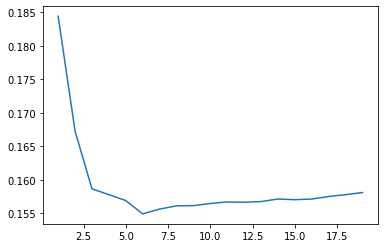

In [7308]:
plt.plot(neighbour, np.array(mad))
plt.show()

In [7309]:
model = neighbors.KNeighborsRegressor(n_neighbors = 7)

In [7312]:
cv3 = cross_val_score(model, X_valid, y_valid, scoring='r2', cv = 10)

In [7313]:
cv3.mean() # score with normalized values

0.7631841332656433

In [7314]:
cv4 = cross_val_score(model, X_valid, y_valid, scoring='neg_root_mean_squared_error', cv = 10)
abs(cv4.mean()) # score with normalized values

0.2325009624690641

### Decision Tree Regression

In [7315]:
X_train = train_data.loc[:, train_data.columns != 'price']
y_train = train_data[['price']]

In [7316]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

In [7317]:
from sklearn.tree import DecisionTreeRegressor
depth = np.arange(1,20)
mae = []

for k in depth:
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    mae.append(np.mean(np.abs(np.array(y_valid) - y_pred)))

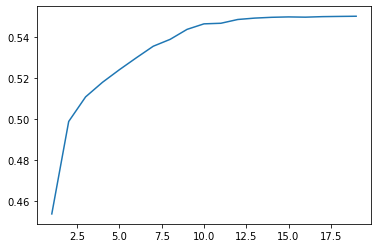

In [7318]:
plt.plot(depth, np.array(mae))
plt.show()

In [7319]:
leaf = np.arange(1,20)
mae = []

for k in leaf:
    reg_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=k)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    mae.append(np.mean(np.abs(np.array(y_valid) - y_pred)))

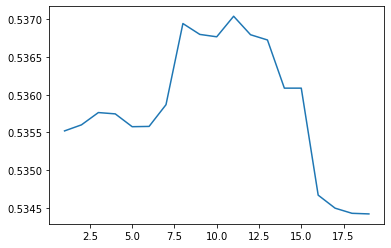

In [7320]:
plt.plot(leaf, np.array(mae))
plt.show()

optimal max_depth = 7 and optimal min_samples_leaf = 5

In [7321]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=7,min_samples_leaf=5)

In [7322]:
cv5 = cross_val_score(reg_tree, X_valid, y_valid, scoring='r2', cv = 10)

In [7323]:
cv5.mean()

0.7614478246728936

In [7324]:
cv6 = cross_val_score(reg_tree, X_valid, y_valid, scoring='neg_root_mean_squared_error', cv = 10)

In [7325]:
abs(cv6.mean())

0.23890963665682513

### Random Forest Regression

In [7327]:
X_train = train_data.loc[:, train_data.columns != 'price']
y_train = train_data[['price']]

In [7328]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

In [7329]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [7330]:
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [7331]:
# y_pred = regressor.predict(X_valid)

In [7332]:
cv5 = cross_val_score(regressor, X_valid, y_valid, scoring='r2', cv = 10)

In [7333]:
cv5.mean()

0.8505381808289743

In [7334]:
cv6 = cross_val_score(regressor, X_valid, y_valid, scoring='neg_root_mean_squared_error', cv = 10)

In [7335]:
abs(cv6.mean())

0.19194059160434068

In [7336]:
import pandas as pd
feature_imp = pd.Series(regressor.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature_imp

lat              0.369860
sqft_living      0.359867
grade            0.083191
long             0.044915
sqft_living15    0.035615
sqft_lot         0.027462
sales_age        0.021734
sqft_above       0.018378
zipcode          0.013514
view             0.008670
condition        0.005248
sqft_basement    0.004368
bathrooms        0.002287
yr_renovated     0.002126
waterfront       0.001615
floors           0.001150
dtype: float64

#### Random Forest is the best model coming out of all 4 models. It can be used further for tuning and evaluation

In [7337]:
n_estimators = [5,20,50,100] # number of trees in the random forest
# max_features = ['auto', 'sqrt'] # number of features in consideration at every split
# max_depth = [5,6,7,8,9] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
# min_samples_leaf = [3, 4, 5] # minimum sample number that can be stored in a leaf node
# bootstrap = [True, False] # method used to sample data points

random_param = {'n_estimators': n_estimators}

In [7338]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = regressor,param_distributions = random_param,
               n_iter = 100, cv = 10, verbose=2, random_state=0, n_jobs = -1)

In [7339]:
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'n_estimators': [5, 20, 50, 100]},
                   random_state=0, verbose=2)

In [7340]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_depth': [5, 6, 7, 8, 9], 'min_samples_leaf': [3, 4, 5]} 

Best Parameters:  {'n_estimators': 100}  



In [7341]:
randmf = RandomForestRegressor(n_estimators = 100) 
# randmf.fit(X_train, y_train) 

In [7343]:
cv5 = cross_val_score(randmf, X_valid, y_valid, scoring='r2', cv = 10)

In [7344]:
cv5.mean()

0.8508089394022287

In [7345]:
cv6 = cross_val_score(randmf, X_valid, y_valid, scoring='neg_root_mean_squared_error', cv = 10)

In [7346]:
abs(cv6.mean())

0.19216087109709162

### EVALUATION

#### Separating the predictor and target variables

In [7347]:
X_test = test_data.loc[:,test_data.columns != 'price']
y_test = test_data[['price']]

In [7348]:
y_test

,price
0,323000.0
1,530000.0
2,189000.0
3,687500.0
4,240000.0
...,...
2164,405000.0
2165,388000.0
2166,608500.0
2167,230000.0


In [7349]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ts_norm = scaler.fit_transform(X_test.values)
# ts_norm = pd.DataFrame(ts_norm, columns=test_data.columns[1:])

In [7350]:
randmf.fit(X_train, y_train)
y_pred = randmf.predict(ts_norm)

In [7352]:
import numpy as np
y_pred = np.exp(y_pred)

In [7353]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8404030792543186

In [7355]:
print(1-(1-r2_score(y_test, y_pred))*((len(ts_norm)-1)/(len(ts_norm)-len(ts_norm[0])-1)))

0.8392164850480309


In [7356]:
y_pred

array([343346.26056671, 567825.09241892, 233365.01099075, ...,
       532843.80492355, 300338.99329165, 458736.73281892])

In [7357]:
y_pred = pd.DataFrame(y_pred)

In [7358]:
price_predictions = X_test.join(y_pred)

In [7359]:
price_predictions.rename(columns = {0:'price'}, inplace = True)

In [7360]:
price_predictions

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sales_age,price
0,1.414214,1890,6560,2,0,0,3,2.645751,1890,0,0,98038,47.3684,-122.031,2390,12,343346.260567
1,1.414214,1810,4850,1,0,0,3,2.645751,1810,0,0,98107,47.6700,-122.394,1360,115,567825.092419
2,1.000000,1200,9850,1,0,0,4,2.645751,1200,0,0,98002,47.3089,-122.210,1060,93,233365.010991
3,1.000000,2330,5000,1,0,0,4,2.645751,1510,820,0,98117,47.6823,-122.368,1460,85,695728.408866
4,1.000000,1220,8075,1,0,0,2,2.645751,890,330,0,98001,47.3341,-122.282,1290,46,227654.050904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2164,1.414214,1980,5020,2,0,0,3,2.645751,1980,0,0,98056,47.5147,-122.190,1980,7,383231.080402
2165,1.414214,2198,6222,2,0,2,3,2.828427,2198,0,0,98198,47.3906,-122.304,2198,4,427986.821131
2166,1.732051,2850,5577,2,0,0,3,2.828427,1950,900,0,98056,47.5252,-122.192,2850,1,532843.804924
2167,1.000000,1140,1201,2,0,0,3,2.828427,1140,0,0,98108,47.5637,-122.295,1210,0,300338.993292
